# MCIT program simulation of students joining the program -> registrating for courses -> graduating
## Purpose: to answer the following research question: 
Is it better to 1) allow students to register whatever they want/can based on current course pre/corequisites? or 2) require students to complete core classes before registering electives?

To visualize the difference in the two scenarios, we can look at the following graphs that shows the course dependencies.

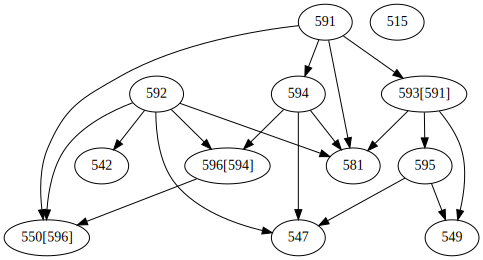

In [17]:
import importlib
import mcitSim
myPolicy = mcitSim.Policy("no-restrictions")
myPolicy.showCourseGraph()

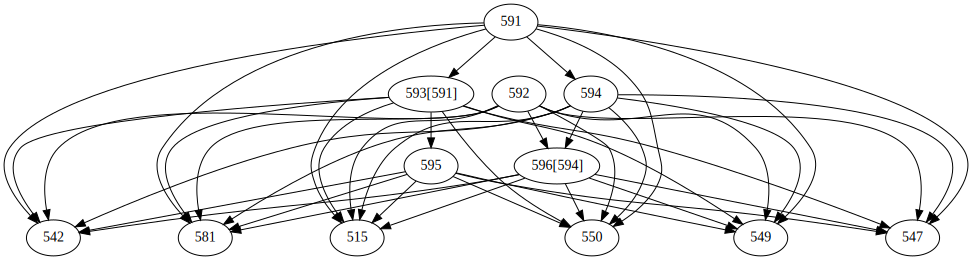

In [18]:
myPolicy = mcitSim.Policy("core-first")
myPolicy.showCourseGraph()

While the graph for core-first scenario looks more complicated, the idea is simple: you just need to finish up all 6 core classes before you are allowed to take any electives. Clearly, this is gives students less "freedom". But is this "freedom" worth it? What is the cost of this "freedom"?

# Run simulations!

Briefly, I made a Python program that simulates students enrolling in the MCIT program -> taking courses -> graduating. By varying the policy of course registration, we can compare and better understand the effects of the policy on students graduation rate and such. Note that the simulation assumes that:
* 1) students are naive and will take any allowable course at random 
* 2) students will always try to register for at least 1 course, 
* 3) students have 50% chance of registering a 2nd course after registering for the first, 
* 4) if no courses are available, student is forced to take a leave of absence
* 5) students graduate when they have completed courses 591-596 and have completed at least 10 courses total

### First run the simulation for the two scenarios: no-restrictions, and core-first
* simulation parameters:
 * replicates: number of simulation replicates (think of it as number of parallel universes)
 * enrollment rate: number of enrolled students per semester
 * duration: number of semester to simulate

In [12]:
# run simulations
import importlib
import mcitSim

noRestrictPolicy = mcitSim.Policy("no-restrictions")
noRestrictSim = mcitSim.Simulator(noRestrictPolicy, coreCapacity=300, electCapacity=50)
# run for 15 semesters, assuming constant enrollment rate per semester
noRestrictSim.run_sim_replicates(replicates=30, enrollmentRate=230, duration=15)
noRestrictData = noRestrictSim.simulatedStudents

coreFirstPolicy = mcitSim.Policy("core-first")
coreFirstSim = mcitSim.Simulator(coreFirstPolicy, coreCapacity=300, electCapacity=50)
coreFirstSim.run_sim_replicates(replicates=30, enrollmentRate=230, duration=15)
coreFirstData = coreFirstSim.simulatedStudents


### Now we can analyze some data:
* starting with the number of course register trials (meaning that a student tried to register for a course but got denied because it was full).

In [13]:
myAnalysis = mcitSim.Analyzer()
myAnalysis.showRegisterTrials(noRestrictData)

,courseID,registerTrials
3,515,13849.100000
2,542,11894.733333
4,581,10264.266667
1,550,9937.633333
0,549,9531.566667
5,547,9384.866667


In [14]:
myAnalysis.showRegisterTrials(coreFirstData)

,courseID,registerTrials
5,581,9072.933333
3,549,9069.033333
0,515,9067.533333
2,547,9066.466667
1,542,9059.566667
4,550,9057.466667


* the numbers here are quite large because we have accumulated about 230 * 15 = 3450 students in the simulation (many students fighting for small elective classes!).
* We can see that the no-restriction scenario resulted in higher register trials for the courses 515, 542 and 581, and these 3 courses are courses that have 0, 1, and 1 prerequisites, respecitvely. This means that more students are fighting over for these "low prerequisites" classes, which makes sense given the no-restriction scenario (more "freedom").
* for the core-first scenario, not surprisingly, all elective courses have evenly distributed number of register trials, because they all share the same dependencies (all students need to finish up core classes first!)
* Note that none of the core classes 591-596 show up here, because they have plenty of capacity (I assumed 300 max capacity for core and only 50 for electives in the simulation)

## Compare average register trials per student
* This measures on average how many times the student will be rejected from taking a class due to it being full (a way of measuring average disappointment of the student).

In [21]:
myAnalysis.averageRegisterTrialsPerStudent(noRestrictData)

18.80062801932367

In [22]:
myAnalysis.averageRegisterTrialsPerStudent(coreFirstData)

15.76608695652174

We can see that in the no-restrictions scenario, students on average tend to have more rejections from taking a class that they want. So it seems that given more "freedom", students will end up with more rejections (and potentially more disappointment).

## Forced to not take courses due to lack of course capacity?
* Here we measure the average number of semesters that students will not take any courses due to the lack of course capacity

In [23]:
myAnalysis.leavesPerStudent(noRestrictData)

2.945381642512077

In [24]:
myAnalysis.leavesPerStudent(coreFirstData)

3.001864734299517

the numbers are quite close, roughly 3 "empty" semesters per student

## Expected graduation time?
* Does the program impact the time that it takes to graduate?

In [25]:
myAnalysis.averageGradTime(noRestrictData)

7.449565217391305

In [26]:
myAnalysis.averageGradTime(coreFirstData)

7.447381642512077

Both scenario takes about 7.4 semesters to graduate. I don't think the policy really impacts the time it takes to graduate.

## Main takeaway
* I think that the no-restrictions policy is fine and while it may result in slightly more course registration "disappiontments" (relative to the core-first policy), I don't think it really impacts the time required for a student to graduation from the program.

#### disclaimer: this is just a simulation and there are many assumptions that do not reflect the reality, so please do not make any important decisions based on this simulation. This is just a simulation for my curiosity and entertainment purposes.